In [111]:
import pandas as pd
import seaborn as sns

In [68]:
YEARS = list(range(2014, 2021))

In [69]:
def read_data():
    df_years = {}
    for year in YEARS:
        df = pd.read_csv('./data/{}/team/combined.csv'.format(year))
        df_years[year] = df
        
    return df_years

In [248]:
def add_columns(df_years):
    updated_df = df_years.copy()
    for year in YEARS:
        df = updated_df[year]
#         df['points'] = df['win']*3 + df['draw']
        df = df.sort_values(by='match_played', ignore_index=True, ascending=False)
        df['stage'] = pd.Series([1]*4 + [0]*(len(df) - 4))
        df['year'] = year
        updated_df[year] = df
        
    return updated_df

In [249]:
def combine_data(df_years):
    df_values = []
    for year in YEARS:
        df_values.append(df_years[year])
        
    return pd.concat(df_values, ignore_index=True)

In [250]:
def normalize_data(df):
    columns_to_normalize = ['win', 'draw', 'loss', 'goal', 'shot', 'cross', 'pass', 'touch', 'cleansheet', 'save', 'tackle', 'foul', 'redcard', 'yellowcard']
    normalized_df = df.copy()
    for column in columns_to_normalize:
        normalized_df[column] = normalized_df[column] / normalized_df['match_played']
        
    return normalized_df

In [251]:
df_years = read_data()
df_years = add_columns(df_years)
df = combine_data(df_years)
clean_df = df.fillna(0)
normalized_df = normalize_data(clean_df)

In [252]:
normalized_df[normalized_df['year'] == 2014]

,team_name,team_short_name,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
0,Kerala Blasters FC,KBFC,17,0.352941,0.235294,0.411765,0.764706,11.117647,19.000000,395.117647,559.470588,0.411765,3.352941,15.705882,12.823529,0.058824,2.176471,1,2014
1,ATK,ATK,17,0.294118,0.529412,0.176471,1.000000,10.294118,16.294118,362.294118,539.000000,0.470588,3.294118,22.823529,14.705882,0.176471,1.882353,1,2014
2,Chennaiyin FC,CFC,16,0.437500,0.312500,0.250000,1.687500,13.937500,15.125000,404.125000,566.937500,0.187500,2.625000,22.187500,14.812500,0.187500,2.250000,1,2014
3,FC Goa,FCG,16,0.375000,0.375000,0.250000,1.312500,14.250000,16.000000,431.562500,605.812500,0.437500,3.312500,22.562500,13.125000,0.062500,1.812500,1,2014
4,Delhi Dynamos FC,DDFC,14,0.285714,0.428571,0.285714,1.142857,12.000000,19.071429,407.785714,566.857143,0.357143,4.428571,12.285714,10.357143,0.142857,1.357143,0,2014
5,FC Pune City,FCPC,14,0.285714,0.285714,0.428571,0.857143,13.428571,19.785714,394.500000,567.214286,0.357143,2.857143,17.000000,10.428571,0.000000,2.000000,0,2014
6,Mumbai City FC,MCFC,14,0.285714,0.285714,0.428571,0.857143,12.928571,16.071429,420.928571,579.642857,0.428571,3.500000,19.000000,11.071429,0.071429,1.857143,0,2014
7,NorthEast United FC,NEUFC,14,0.214286,0.428571,0.357143,0.785714,11.357143,19.357143,434.571429,611.000000,0.428571,3.714286,20.857143,10.642857,0.214286,1.285714,0,2014


In [253]:
normalized_df.describe()

,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,17.938462,0.344443,0.296325,0.357366,1.324891,11.641395,13.974434,399.405691,548.389158,0.272153,2.924361,26.103376,13.083708,0.100148,1.985196,0.430769,2017.230769
std,2.530297,0.137884,0.123571,0.135574,0.378681,1.566543,2.979266,49.849878,48.928888,0.125326,0.647116,5.584664,1.754294,0.075550,0.437521,0.499038,2.006001
min,14.000000,0.100000,0.058824,0.117647,0.666667,8.222222,8.944444,324.000000,461.500000,0.000000,1.666667,12.285714,9.277778,0.000000,1.166667,0.000000,2014.000000
25%,16.000000,0.250000,0.214286,0.250000,1.050000,10.300000,11.900000,361.550000,512.444444,0.166667,2.500000,21.500000,12.277778,0.050000,1.666667,0.000000,2016.000000
50%,18.000000,0.333333,0.285714,0.350000,1.277778,11.722222,13.785714,396.647059,544.888889,0.250000,2.833333,25.785714,13.000000,0.100000,2.000000,0.000000,2017.000000
75%,20.000000,0.437500,0.388889,0.428571,1.555556,12.642857,15.250000,427.642857,579.642857,0.380952,3.388889,30.529412,14.277778,0.166667,2.250000,1.000000,2019.000000
max,23.000000,0.666667,0.550000,0.722222,2.550000,15.476190,20.647059,540.000000,666.285714,0.562500,4.428571,37.700000,16.888889,0.285714,3.166667,1.000000,2020.000000


<AxesSubplot:>

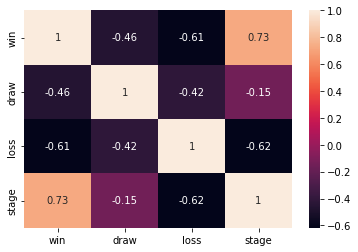

In [254]:
sns.heatmap(normalized_df[['win', 'draw', 'loss', 'stage']].corr(), annot=True)

<AxesSubplot:>

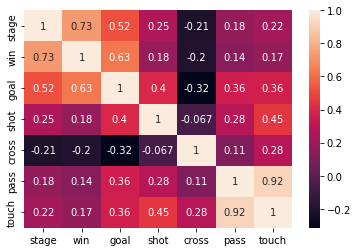

In [255]:
sns.heatmap(normalized_df[['stage', 'win', 'goal', 'shot', 'cross', 'pass', 'touch']].corr(), annot=True)

<AxesSubplot:>

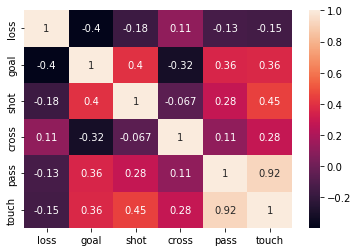

In [187]:
sns.heatmap(normalized_df[['loss', 'goal', 'shot', 'cross', 'pass', 'touch']].corr(), annot=True)

<AxesSubplot:>

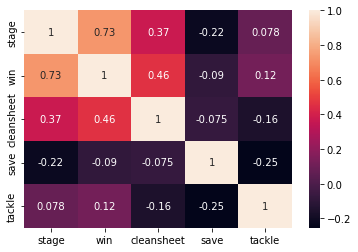

In [256]:
sns.heatmap(normalized_df[['stage', 'win', 'cleansheet', 'save', 'tackle']].corr(), annot=True)

<AxesSubplot:>

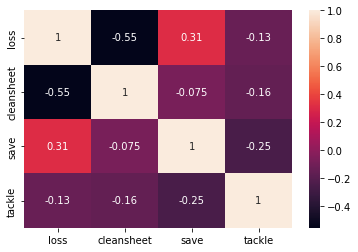

In [197]:
sns.heatmap(normalized_df[['loss', 'cleansheet', 'save', 'tackle']].corr(), annot=True)

<AxesSubplot:>

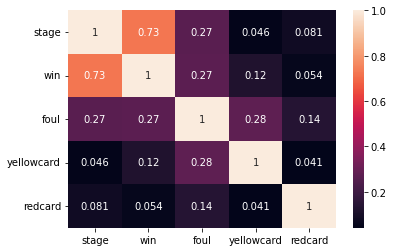

In [257]:
sns.heatmap(normalized_df[['stage', 'win', 'foul', 'yellowcard', 'redcard']].corr(), annot=True)

<AxesSubplot:>

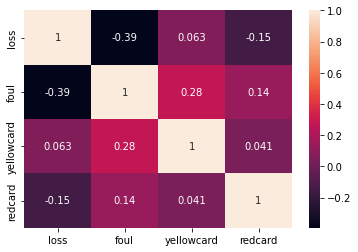

In [198]:
sns.heatmap(normalized_df[['loss', 'foul', 'yellowcard', 'redcard']].corr(), annot=True)

In [231]:
normalized_df[normalized_df['stage'] > 0].describe()

,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0000
mean,19.071429,0.458698,0.275170,0.261798,1.549762,12.090653,13.248814,409.452582,560.589031,0.325407,2.762448,26.603416,13.615865,0.107147,2.008009,1.500000,2017.0000
std,2.417966,0.098690,0.130287,0.075700,0.404678,1.584168,2.777119,60.614451,53.692388,0.127533,0.586232,5.786573,1.245089,0.069900,0.303274,0.509175,2.0367
min,16.000000,0.294118,0.058824,0.117647,0.764706,9.235294,9.666667,325.285714,471.681818,0.062500,1.863636,15.705882,10.809524,0.000000,1.500000,1.000000,2014.0000
25%,17.000000,0.375000,0.190476,0.200000,1.200000,11.123162,11.038820,359.281250,519.792857,0.233289,2.463235,22.368304,12.817647,0.050000,1.864890,1.000000,2015.0000
50%,20.000000,0.450000,0.236695,0.250000,1.525000,12.025000,12.678571,405.862500,557.259104,0.351471,2.622024,26.273109,13.366667,0.121324,2.000000,1.500000,2017.0000
75%,21.000000,0.525210,0.375000,0.317708,1.857143,13.177941,14.457721,454.953125,600.628125,0.415966,3.137500,31.072727,14.661765,0.156618,2.179228,2.000000,2019.0000
max,23.000000,0.666667,0.545455,0.411765,2.550000,15.476190,20.647059,540.000000,666.285714,0.562500,4.176471,37.700000,16.312500,0.235294,2.705882,2.000000,2020.0000


In [232]:
normalized_df[normalized_df['stage'] == 0].describe()

,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000
mean,17.081081,0.257979,0.312334,0.429687,1.154719,11.301416,14.523552,391.802638,539.156821,0.231853,3.046890,25.724968,12.680995,0.094852,1.967932,0.0,2017.405405
std,2.289813,0.093045,0.117489,0.126091,0.251031,1.484856,3.045633,39.042174,43.480387,0.108855,0.671482,5.476423,1.980295,0.080099,0.520209,0.0,1.992478
min,14.000000,0.100000,0.111111,0.150000,0.666667,8.222222,8.944444,324.000000,461.500000,0.000000,1.666667,12.285714,9.277778,0.000000,1.166667,0.0,2014.000000
25%,14.000000,0.214286,0.222222,0.357143,0.928571,10.111111,12.166667,363.611111,510.600000,0.150000,2.550000,21.500000,11.000000,0.000000,1.550000,0.0,2016.000000
50%,18.000000,0.285714,0.285714,0.428571,1.142857,11.714286,14.388889,394.285714,538.166667,0.222222,3.000000,25.785714,12.611111,0.071429,1.888889,0.0,2018.000000
75%,18.000000,0.333333,0.400000,0.500000,1.333333,12.333333,16.071429,409.650000,570.055556,0.300000,3.500000,30.000000,14.050000,0.166667,2.388889,0.0,2019.000000
max,20.000000,0.428571,0.550000,0.722222,1.611111,14.222222,20.285714,483.500000,628.611111,0.428571,4.428571,34.777778,16.888889,0.285714,3.166667,0.0,2020.000000


In [218]:
normalized_df['team_name'].unique()

array(['Kerala Blasters FC', 'ATK', 'Chennaiyin FC', 'FC Goa',
       'Delhi Dynamos FC', 'FC Pune City', 'Mumbai City FC',
       'NorthEast United FC', 'ATK FC', 'Bengaluru FC', 'Jamshedpur FC',
       'Odisha FC', 'Hyderabad FC', 'ATK Mohun Bagan', 'SC East Bengal'],
      dtype=object)

In [221]:
normalized_df[normalized_df['team_short_name'] == 'JFC']

,team_name,team_short_name,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
29,Jamshedpur FC,JFC,18,0.388889,0.277778,0.333333,0.888889,10.222222,14.277778,324.000000,461.500000,0.388889,2.722222,24.833333,15.000000,0.166667,1.888889,0,2017
40,Jamshedpur FC,JFC,18,0.333333,0.500000,0.166667,1.611111,11.944444,13.277778,476.277778,628.611111,0.277778,2.111111,26.888889,12.333333,0.000000,1.388889,0,2018
50,Jamshedpur FC,JFC,18,0.222222,0.333333,0.444444,1.222222,11.388889,14.388889,401.111111,562.388889,0.111111,3.000000,34.500000,12.444444,0.166667,2.055556,0,2019
58,Jamshedpur FC,JFC,20,0.350000,0.300000,0.350000,1.050000,10.700000,15.250000,328.200000,473.350000,0.400000,2.950000,33.600000,15.500000,0.200000,1.550000,0,2020


In [227]:
normalized_df[normalized_df['team_short_name'] == 'FCPC']

,team_name,team_short_name,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
5,FC Pune City,FCPC,14,0.285714,0.285714,0.428571,0.857143,13.428571,19.785714,394.500000,567.214286,0.357143,2.857143,17.000000,10.428571,0.000000,2.000000,0,2014
14,FC Pune City,FCPC,14,0.285714,0.214286,0.500000,1.214286,11.714286,20.285714,408.000000,600.285714,0.214286,3.142857,25.428571,10.785714,0.071429,1.428571,0,2015
21,FC Pune City,FCPC,14,0.285714,0.285714,0.428571,0.928571,8.857143,17.642857,391.785714,526.428571,0.142857,3.642857,20.214286,11.000000,0.071429,1.857143,0,2016
27,FC Pune City,FCPC,20,0.450000,0.200000,0.350000,1.550000,10.300000,9.950000,407.600000,537.000000,0.350000,2.600000,22.450000,13.400000,0.150000,1.900000,1,2017
38,FC Pune City,FCPC,18,0.333333,0.222222,0.444444,1.333333,11.555556,10.666667,329.611111,476.111111,0.111111,4.055556,21.500000,12.611111,0.166667,2.777778,0,2018


In [214]:
normalized_df[normalized_df['team_short_name'] == 'ATKMB']

,team_name,team_short_name,match_played,win,draw,loss,goal,shot,cross,pass,touch,cleansheet,save,tackle,foul,redcard,yellowcard,stage,year
55,ATK Mohun Bagan,ATKMB,23,0.565217,0.217391,0.217391,1.391304,12.869565,10.869565,330.652174,484.173913,0.434783,2.565217,34.304348,14.913043,0.0,2.0,2,2020
